In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import ast
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from scipy import stats
from scipy.stats import t
import numpy as np
import pandas as pd
from itertools import combinations
from functions import *

In [3]:
def calcAcc(D1):
    
    D1['number_of_letters'] = D1['correctSequence'].apply(lambda x: len(x))
    # D1[D1['number_of_letters']==3]
    accuracies = []
    for idx,row in D1.iterrows():
        accuracies.append(np.intersect1d(row['correctSequence'], row['userInput']).size / len(row['correctSequence']))
    D1['accuracies'] = np.array(accuracies)

In [26]:
def calcRecencyAcc(D1):
    n_recency = 6
    accuracies = []
    for idx, row in D1.iterrows():
        accuracies.append(np.intersect1d(row['correctSequence'][-6:], row['userInput']).size / n_recency)
    D1['recencyAccuracies'] = np.array(accuracies)

In [64]:
D1 = loadDataFrame("Ali\eksperiment1.csv")
D2 = loadDataFrame("Carl\eksperiment1.csv")
D3 = loadDataFrame("Erik\eksperiment1.csv")
D4 = loadDataFrame("Kasper\eksperiment1.csv")

df = pd.concat([D1,D2,D3,D4], ignore_index=True)
df1 = df[df["wait"] == 1]
calcAcc(df1)
calcRecencyAcc(df1)
df1

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\kaspe\AppData\Local\Temp\ipykernel_12388\236634516.py:1: SyntaxWarning: invalid escape sequence '\e'
  D1 = loadDataFrame("Ali\eksperiment1.csv")
C:\Users\kaspe\AppData\Local\Temp\ipykernel_12388\236634516.py:2: SyntaxWarning: invalid escape sequence '\e'
  D2 = loadDataFrame("Carl\eksperiment1.csv")
C:\Users\kaspe\AppData\Local\Temp\ipykernel_12388\236634516.py:3: SyntaxWarning: invalid escape sequence '\e'
  D3 = loadDataFrame("Erik\eksperiment1.csv")
C:\Users\kaspe\AppData\Local\Temp\ipykernel_12388\236634516.py:4: SyntaxWarning: invalid escape sequence '\e'
  D4 = loadDataFrame("K

,wait,correctSequence,userInput,number_of_letters,accuracies,recencyAccuracies
4,1.0,"[67, 96, 28, 95, 42, 73, 74, 83, 66, 82, 20, 4...","[52, 33, 96, 97, 86, 82, 72, 71, 45, 56, 23, 9...",20,0.25,0.333333
5,1.0,"[35, 85, 12, 32, 97, 33, 63, 14, 13, 53, 59, 2...","[74, 75, 76, 35, 34, 65, 12, 34, 15, 43, 65, 8...",20,0.35,0.500000
6,1.0,"[18, 55, 47, 36, 73, 51, 37, 12, 42, 63, 44, 2...","[61, 86, 14, 19, 18, 27, 25, 47, 46, 45, 69, 1...",20,0.30,0.666667
7,1.0,"[66, 19, 36, 37, 28, 47, 27, 79, 11, 67, 33, 8...","[10, 69, 63, 67, 18, 19, 32, 17, 65, 34, 59, 1...",20,0.45,0.666667
24,1.0,"[64, 81, 65, 94, 53, 63, 89, 37, 17, 72, 24, 2...","[34,, 55,, 44,, 50,, 38,, 72,, 70,, 24,, 82,, ...",20,0.00,0.000000
25,1.0,"[54, 39, 84, 74, 71, 64, 61, 76, 17, 35, 70, 2...","[91,, 27,, 66,, 84,, 71,, 61,, 51,, 74,, 64,, ...",20,0.00,0.000000
26,1.0,"[81, 30, 77, 48, 16, 65, 14, 50, 52, 42, 84, 8...","[59,, 34,, 72,, 72,, 95,, 30,, 48,, 88,, 15,, ...",20,0.00,0.000000
27,1.0,"[23, 82, 13, 33, 83, 64, 26, 78, 62, 51, 14, 4...","[35,, 43,, 74,, 33,, 23,, 11,, 64,, 28,, 45]",20,0.00,0.000000
44,1.0,"[16, 92, 41, 72, 98, 35, 71, 96, 75, 38, 13, 4...","[97, 80, 42, 44, 48, 16, 12, 96, 80, 38, 35, 5...",20,0.50,0.500000
45,1.0,"[12, 29, 70, 19, 20, 34, 13, 11, 83, 52, 18, 3...","[11, 12, 13, 18, 69, 63, 62, 80, 72, 29, 83, 2...",20,0.50,0.333333


In [65]:
D1 = loadDataFrame("Ali\eksperiment2_WorkingMemoryFalse.csv")
D2 = loadDataFrame("Carl\eksperiment2_WorkingMemoryFalse.csv")
D3 = loadDataFrame("Erik\eksperiment2_WorkingMemoryFalse.csv")
D4 = loadDataFrame("Kasper\eksperiment2_WorkingMemoryFalse.csv")

df2 = pd.concat([D1,D2,D3,D4], ignore_index=True)
calcAcc(df2)
calcRecencyAcc(df2)
df2

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\kaspe\AppData\Local\Temp\ipykernel_12388\588883986.py:1: SyntaxWarning: invalid escape sequence '\e'
  D1 = loadDataFrame("Ali\eksperiment2_WorkingMemoryFalse.csv")
C:\Users\kaspe\AppData\Local\Temp\ipykernel_12388\588883986.py:2: SyntaxWarning: invalid escape sequence '\e'
  D2 = loadDataFrame("Carl\eksperiment2_WorkingMemoryFalse.csv")
C:\Users\kaspe\AppData\Local\Temp\ipykernel_12388\588883986.py:3: SyntaxWarning: invalid escape sequence '\e'
  D3 = loadDataFrame("Erik\eksperiment2_WorkingMemoryFalse.csv")
C:\Users\kaspe\AppData\Local\Temp\ipykernel_12388\588883986.py:4: SyntaxWarn

,wait,correctSequence,userInput,number_of_letters,accuracies,recencyAccuracies
0,1,"[59, 31, 21, 28, 68, 98, 79, 54, 27, 69, 87, 7...","[46,, 24,, 32,, 51,, 31,, 61]",20,0.00,0.000000
1,1,"[14, 78, 71, 43, 94, 75, 96, 57, 30, 79, 45, 8...","[63,, 91,, 96,, 14,, 95,, 63,, 54]",20,0.00,0.000000
2,1,"[83, 21, 75, 89, 14, 65, 29, 41, 33, 63, 71, 3...","[32,, 98,, 19,, 10,, 83]",20,0.05,0.000000
3,1,"[82, 17, 92, 32, 21, 79, 83, 98, 71, 34, 59, 5...","[29,, 26,, 72,, 71,, 75,, 85,, 65,, 22,, 21,, ...",20,0.05,0.000000
4,1,"[13, 25, 86, 57, 89, 14, 49, 46, 93, 16, 23, 6...","[13,, 69,, 71,, 68,, 51,, 27,, 81,, 82,, 25,, 74]",20,0.00,0.000000
...,...,...,...,...,...,...
65,1,"[84, 43, 21, 99, 16, 68, 33, 12, 72, 58, 91, 3...","[21, 67, 46, 68, 33, 74, 29, 72, 54, 94, 35]",20,0.45,0.666667
66,1,"[74, 95, 32, 89, 57, 23, 41, 36, 99, 64, 13, 8...","[23, 18, 49, 64, 36, 85, 13, 52]",20,0.30,0.166667
67,1,"[65, 27, 10, 92, 84, 71, 99, 47, 44, 58, 39, 9...","[47, 84, 90, 30, 25, 93, 71, 19, 54, 99]",20,0.45,0.666667
68,1,"[59, 62, 12, 78, 31, 33, 15, 40, 66, 99, 89, 4...","[99, 89, 13, 19, 62, 33, 24]",20,0.30,0.166667


In [66]:
D1 = loadDataFrame("Ali\eksperiment2_WorkingMemoryTrue.csv")
D2 = loadDataFrame("Carl\eksperiment2_WorkingMemoryTrue.csv")
D3 = loadDataFrame("Erik\eksperiment2_WorkingMemoryTrue.csv")
D4 = loadDataFrame("Kasper\eksperiment2_WorkingMemoryTrue.csv")

df3 = pd.concat([D1,D2,D3,D4], ignore_index=True)
calcAcc(df3)
calcRecencyAcc(df3)
df3

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\kaspe\AppData\Local\Temp\ipykernel_12388\3320156534.py:1: SyntaxWarning: invalid escape sequence '\e'
  D1 = loadDataFrame("Ali\eksperiment2_WorkingMemoryTrue.csv")
C:\Users\kaspe\AppData\Local\Temp\ipykernel_12388\3320156534.py:2: SyntaxWarning: invalid escape sequence '\e'
  D2 = loadDataFrame("Carl\eksperiment2_WorkingMemoryTrue.csv")
C:\Users\kaspe\AppData\Local\Temp\ipykernel_12388\3320156534.py:3: SyntaxWarning: invalid escape sequence '\e'
  D3 = loadDataFrame("Erik\eksperiment2_WorkingMemoryTrue.csv")
C:\Users\kaspe\AppData\Local\Temp\ipykernel_12388\3320156534.py:4: SyntaxWar

,wait,correctSequence,userInput,number_of_letters,accuracies,recencyAccuracies
0,1,"[78, 52, 51, 67, 57, 15, 66, 24, 32, 16, 90, 6...","[78,, 58,, 91,, 67,, 57,, 51]",20,0.05,0.000000
1,1,"[96, 54, 31, 73, 25, 53, 89, 70, 16, 66, 23, 8...","[93,, 55,, 47,, 78,, 53,, 61,, 84]",20,0.00,0.000000
2,1,"[47, 50, 25, 67, 98, 12, 77, 10, 61, 34, 15, 6...","[67,, 51,, 17,, 97,, 79,, 55]",20,0.00,0.000000
3,1,"[14, 35, 22, 60, 25, 15, 57, 62, 86, 96, 64, 8...","[10,, 37,, 97,, 45,, 14,, 53]",20,0.00,0.000000
4,1,"[30, 10, 14, 93, 19, 77, 96, 56, 29, 78, 20, 8...","[10,, 30,, 67,, 66,, 57,, 14,, 93,, 73,, 17]",20,0.00,0.000000
...,...,...,...,...,...,...
65,1,"[21, 14, 52, 60, 17, 87, 43, 33, 45, 91, 25, 5...","[22, 45, 91, 25, 56, 88, 48, 25, 14, 42]",20,0.35,0.333333
66,1,"[88, 39, 26, 92, 31, 78, 95, 59, 66, 11, 54, 3...","[68, 95, 59, 11, 54, 33, 81, 48, 52]",20,0.35,0.166667
67,1,"[55, 77, 18, 80, 20, 93, 13, 25, 31, 61, 42, 5...","[50, 93, 13, 25, 30, 16]",20,0.25,0.333333
68,1,"[30, 99, 67, 41, 73, 81, 32, 48, 35, 64, 86, 5...","[67, 81, 32, 48, 64, 14, 60, 53, 90]",20,0.35,0.333333


In [67]:
### Calculating the average mean accuracy in experiment 1
meanRecAcc1 = df1["recencyAccuracies"].mean()
meanRecAcc2 = df2["recencyAccuracies"].mean()
meanRecAcc3 = df3["recencyAccuracies"].mean()

print(meanRecAcc1, "   ", meanRecAcc2, "   ", meanRecAcc3)

0.41666666666666663     0.36190476190476195     0.16904761904761906


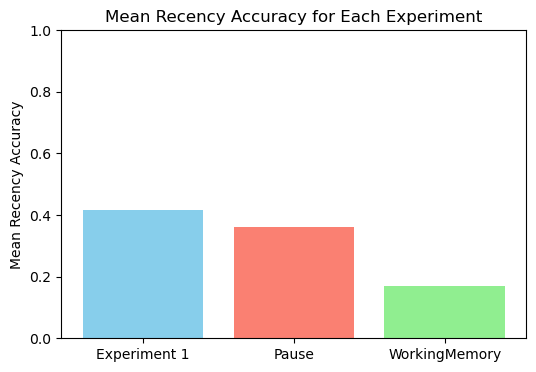

In [75]:
means = [meanRecAcc1, meanRecAcc2, meanRecAcc3]
labels = ['Experiment 1', 'Pause', 'WorkingMemory']

plt.figure(figsize=(6,4))
plt.bar(labels, means, color=['skyblue', 'salmon', 'lightgreen'])
plt.ylabel('Mean Recency Accuracy')
plt.title('Mean Recency Accuracy for Each Experiment')
plt.ylim(0, 1)
plt.show()

In [76]:
### Performing t-test for each combination of means

stat, pval12 = stats.ttest_ind(df1['accuracies'], df2['accuracies'])
stat, pval13 = stats.ttest_ind(df1['accuracies'], df3['accuracies'])
stat, pval23 = stats.ttest_ind(df2['accuracies'], df3['accuracies'])

print(pval12, "   ", pval13, "   ", pval23)

0.7907036344641362     0.027523466020216943     0.023662447579039375


In [74]:

model = smf.ols('accuracies ~ wait', data=df).fit()
model.f_pvalue

np.float64(0.00013876864927117266)

In [75]:
dfMeans = df.groupby('wait')[[ 'accuracies']].mean()


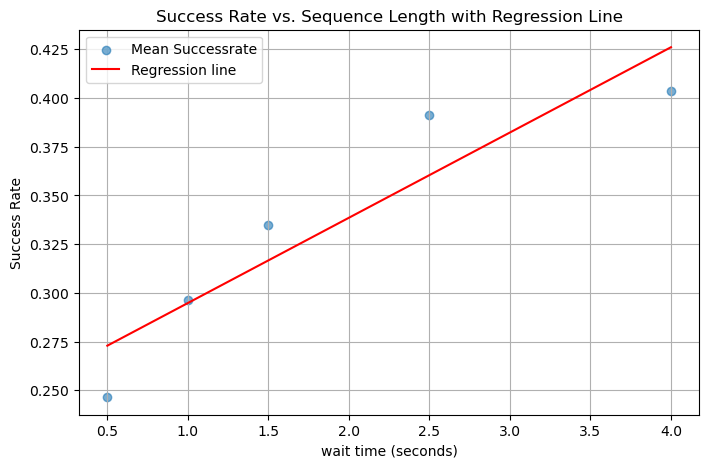

In [76]:
x_vals = np.linspace(df['wait'].min(), df['wait'].max(), 50)
y_vals = model.predict(pd.DataFrame({'wait': x_vals}))# Plot with regression line
plt.figure(figsize=(8, 5))

plt.scatter(dfMeans.index, dfMeans['accuracies'], alpha=0.6, label='Mean Successrate')
plt.plot(x_vals, y_vals, color='red', label='Regression line')
plt.xlabel("wait time (seconds)")
plt.ylabel("Success Rate")
plt.title("Success Rate vs. Sequence Length with Regression Line")
plt.legend()
plt.grid(True)
plt.show()